In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore

%matplotlib inline
sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [7]:
df.isnull().sum()


meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

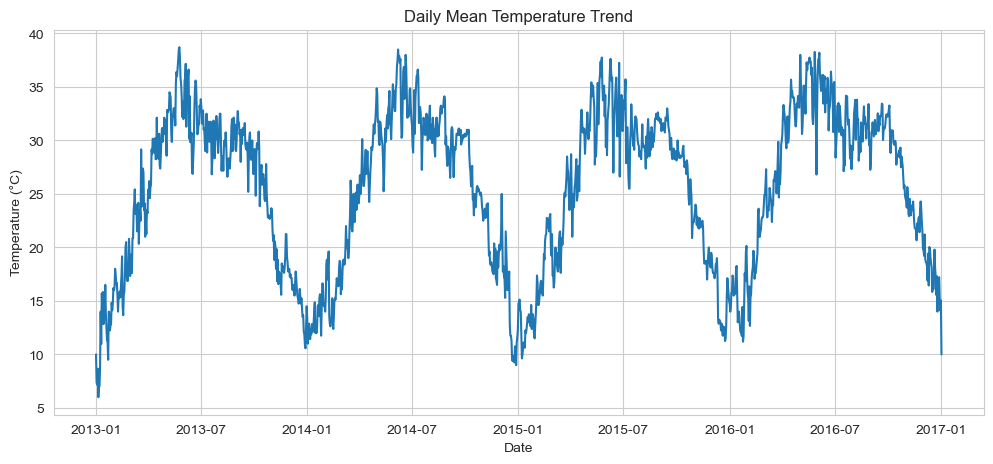

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df['meantemp'])
plt.title("Daily Mean Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


Temperature Trend Analysis-

1)Daily mean temperature exhibits clear long-term fluctuations, indicating the presence of seasonal climate patterns rather than random variation.

2)Periodic rises and falls in temperature suggest predictable annual cycles, which are critical for agricultural and energy planning.

3)Absence of abrupt long-term upward or downward shifts indicates relatively stable climatic conditions during the observed period.

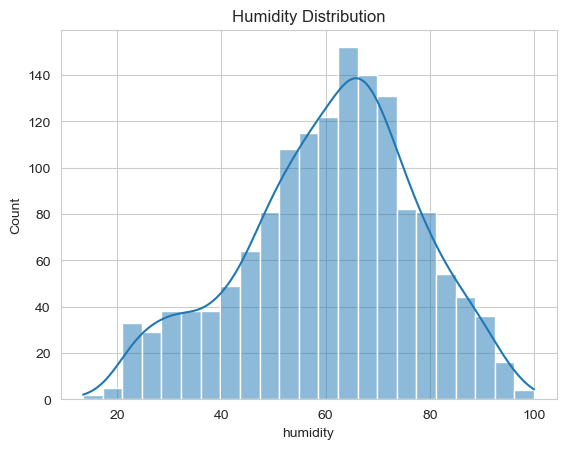

In [9]:
sns.histplot(df['humidity'], kde=True)
plt.title("Humidity Distribution")
plt.show()


Humidity Distribution Analysis-

1)Humidity levels are concentrated around mid-range values, indicating stable atmospheric moisture conditions for most days.

2)Extreme humidity values occur infrequently, suggesting lower probability of severe moisture-related weather events.

3)This distribution pattern is useful for predicting comfort levels and managing weather-sensitive operations.

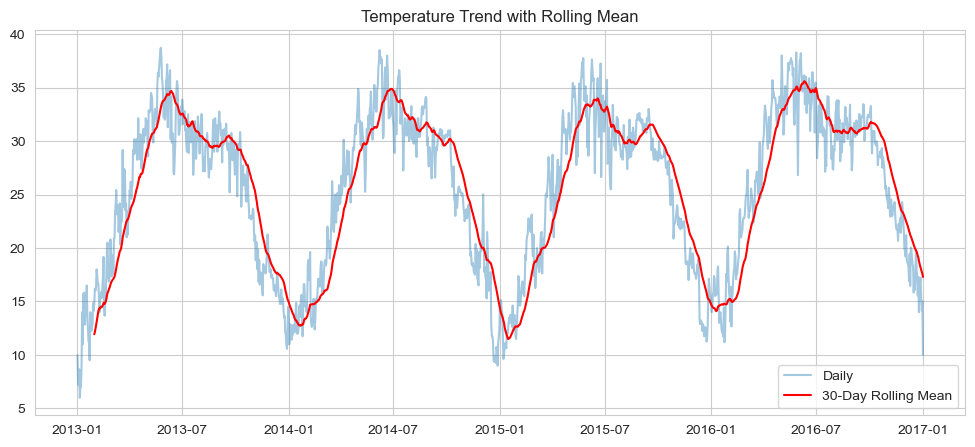

In [10]:
df['temp_rolling_30'] = df['meantemp'].rolling(window=30).mean()

plt.figure(figsize=(12,5))
plt.plot(df['meantemp'], alpha=0.4, label="Daily")
plt.plot(df['temp_rolling_30'], color='red', label="30-Day Rolling Mean")
plt.legend()
plt.title("Temperature Trend with Rolling Mean")
plt.show()


Rolling Mean (30-Day Window)

1)The 30-day rolling average smooths short-term volatility and highlights the underlying temperature trend more clearly.

2)Rolling mean confirms that short-term temperature spikes are temporary and normalize over time.

3)This smoothed trend is useful for medium-term weather forecasting and climate impact assessments.

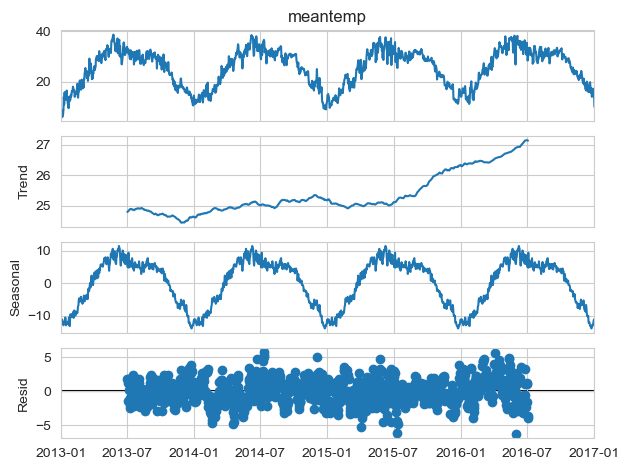

In [11]:
decomposition = seasonal_decompose(df['meantemp'], model='additive', period=365)
decomposition.plot()
plt.show()


Seasonal Decomposition Analysis

1)Seasonal decomposition reveals a strong and consistent yearly seasonal component in temperature data.

2)The trend component reflects gradual climatic changes, while residuals capture irregular weather anomalies.

3)Clear separation of components validates the suitability of additive time-series modeling for this dataset.

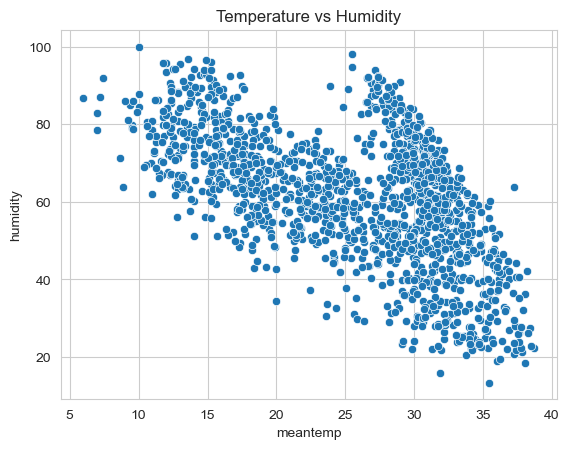

In [12]:
sns.scatterplot(x=df['meantemp'], y=df['humidity'])
plt.title("Temperature vs Humidity")
plt.show()


Bivariate Analysis (Temperature vs Humidity)

1)A moderate inverse relationship is observed between temperature and humidity, where higher temperatures often correspond to lower humidity levels.

2)This relationship aligns with expected meteorological behavior and supports the reliability of the dataset.

3)Understanding this interaction is essential for climate modeling and environmental monitoring systems.

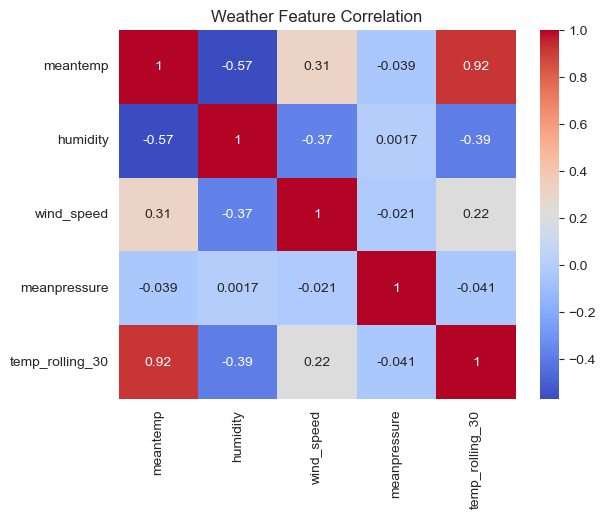

In [13]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Weather Feature Correlation")
plt.show()


Correlation Analysis

1)Temperature and humidity show noticeable correlation, while atmospheric pressure remains relatively independent.

2)Low multicollinearity among features suggests that each variable contributes distinct information.

3)Such independence is beneficial for predictive modeling and anomaly detection tasks.

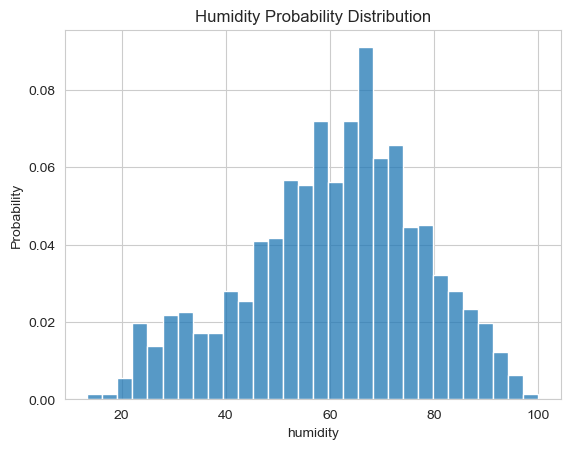

In [16]:
sns.histplot(df['humidity'], bins=30, stat='probability')
plt.title("Humidity Probability Distribution")
plt.show()


Humidity Probability Distribution Analysis-
1) Higher probability density observed in mid-range humidity values
2) Extreme humidity values are rare

In [14]:
df['temp_zscore'] = zscore(df['meantemp'])
extreme_events = df[np.abs(df['temp_zscore']) > 3]
extreme_events.head()


,meantemp,humidity,wind_speed,meanpressure,temp_rolling_30,temp_zscore
date,,,,,,


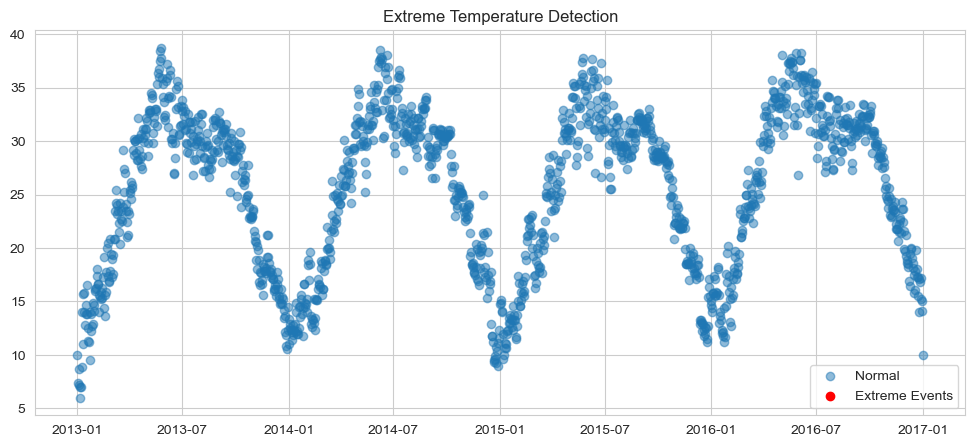

In [15]:
plt.figure(figsize=(12,5))
plt.scatter(df.index, df['meantemp'], label="Normal", alpha=0.5)
plt.scatter(extreme_events.index, extreme_events['meantemp'],
            color='red', label="Extreme Events")
plt.legend()
plt.title("Extreme Temperature Detection")
plt.show()


Extreme Weather Detection (Z-Score Method)

1)Z-score analysis successfully identifies rare and statistically significant extreme temperature events.

2)These anomalies represent potential heatwaves or unusually cold days that may impact public health and infrastructure.

3)Early identification of such events can support disaster preparedness and climate risk mitigation strategies.

## Final Insights & Business Conclusion
The dataset demonstrates strong seasonal behavior with limited extreme anomalies, indicating a largely stable climate pattern.

Time-series techniques such as rolling mean and seasonal decomposition provide meaningful insights into climate behavior.

Statistical anomaly detection methods are effective for identifying extreme weather conditions with real-world applicability.

Key Findings-
1)Temperature exhibits clear seasonal behavior

2)Rolling averages reveal stable long-term trends

3)Seasonal decomposition confirms annual cyclicity

4)Extreme weather events are statistically rare but significant

Practical Applications-
1)Climate forecasting

2)Disaster preparedness

3)Environmental monitoring
